# Ques:Take Darts dataset from "https://www2.stetson.edu/~jrasp/data.htm".
(Dropped non-numeric values from this dataset)

In [56]:
#Importing all reqiured libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the Darts dataset.
data=pd.read_excel("Darts.xls")

In [57]:
#Printing the five rows from starting of the dataset.
data.head()

,Expert #1,Expert #2,Expert #3,Expert #4,Dart #1,Dart #2,Dart #3,Dart #4,DJIA
0,51.6,8.0,7.7,-16.7,53.8,-10.2,-8.6,-35.0,2.5
1,56.7,37.8,27.8,-16.7,36.7,-3.7,-3.9,-22.0,11.5
2,29.8,4.6,-9.4,-14.9,6.8,-9.8,-11.3,-42.9,-2.3
3,-13.7,-18.2,-19.4,-28.6,44.4,-9.0,-20.3,-44.0,-9.2
4,25.8,-39.8,-40.4,-96.9,12.9,-9.8,-31.4,-37.1,-8.5


(a) Find the Covariance matrix Correlation matrix of this data set.

In [58]:
#Finding Covariance Matrix.
cov_matrix=np.array(data.cov())
print("Covariance matrix for the given dataset:\n")
print(cov_matrix)
print("********************************************************************")

#Finding Correlation Matrix.
cor_matrix=data.corr()
print("Correlation matrix for the given dataset:\n")
print(cor_matrix)

Covariance matrix for the given dataset:

[[2119.27594726  811.71575203  435.3159398   261.24765865  669.76150079
   141.00547619  135.27453406   66.54615274  147.81208415]
 [ 811.71575203  718.83163545  407.33611826  316.15999301  140.05236092
   108.51176125  104.57603998   84.11054655  102.67764188]
 [ 435.3159398   407.33611826  470.5278399   392.40273553  270.75016541
   128.08553164  115.61992079  109.48210418   97.01268102]
 [ 261.24765865  316.15999301  392.40273553  601.63260833  118.06159072
   131.72681018  133.43374336  168.23772715   98.6088454 ]
 [ 669.76150079  140.05236092  270.75016541  118.06159072 3859.53061877
   371.80466406  300.65044264   97.66656929   75.39816047]
 [ 141.00547619  108.51176125  128.08553164  131.72681018  371.80466406
   346.89210046  221.8892531   201.05403783   77.80719178]
 [ 135.27453406  104.57603998  115.61992079  133.43374336  300.65044264
   221.8892531   360.11807474  336.06487653   69.78918787]
 [  66.54615274   84.11054655  109.482104

(b) Perform PCA/SVD, choose appropriate number of dimension/Principal components/singular values and find the new data matrix.

In [59]:
# Performing data preprocessing to make the data standardized.
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)

In [60]:
#Initializing PCA using sklearn.

from sklearn import decomposition
pca = decomposition.PCA()


In [61]:
#Performing PCA by choosing the number of principal components as 2.
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

#To print new data matrix after performing PCA
print("The new data matrix after performing PCA:")
print(pca_data)

#To print shape of the new data matrix
print("shape of new data matrix = ", pca_data.shape)


The new data matrix after performing PCA:
[[-0.27034445  0.55358822]
 [ 1.22159001  0.8530145 ]
 [-1.21146686  0.41735786]
 [-2.54909877 -0.32452449]
 [-4.22186892 -0.8614971 ]
 [-4.42015446 -0.06406394]
 [-2.66127479  0.57445628]
 [-3.37918889  1.2943005 ]
 [ 1.12673699  1.56922457]
 [ 1.55658946 -0.27767205]
 [ 5.83501879 -1.82718109]
 [ 4.93218594  0.86915016]
 [ 1.76487003 -1.94720826]
 [ 2.3748943  -2.2106197 ]
 [ 1.745666   -0.32814398]
 [ 0.5747558   0.23428144]
 [ 0.60008586 -0.54495136]
 [-1.80543372  1.18233353]
 [ 0.13429988  0.77503349]
 [ 0.95032782  1.84026582]
 [ 2.27067931  1.06953822]
 [ 0.95413226  0.48720507]
 [-0.77914889 -0.73881198]
 [ 0.35488324 -0.20495579]
 [-0.9616876  -2.05483584]
 [-0.41395037 -2.01758376]
 [-0.84981108 -0.39885145]
 [-1.07846352 -1.50352777]
 [-0.73892068 -0.01952428]
 [-0.83449641 -1.06784413]
 [ 0.15301368  0.4383487 ]
 [-0.14751243  1.28268712]
 [-1.36501552 -2.43069199]
 [ 1.71560176 -0.76193189]
 [-1.22678504 -0.94874138]
 [ 1.57609035

(c) Plot the scatter plot of this data along the first two dimensions(or three if it is possible).

     First_principal  Second_principal
0          -0.270344          0.553588
1           1.221590          0.853015
2          -1.211467          0.417358
3          -2.549099         -0.324524
4          -4.221869         -0.861497
..               ...               ...
142        -0.617311         -0.068929
143        -0.958022          0.861458
144        -2.702082          1.804331
145        -2.185623         -0.153344
146        -5.420191         -0.151561

[147 rows x 2 columns]


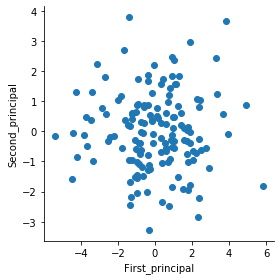

In [62]:
#To plot the resultant PCA data,create a new dataframe.
df_pca = pd.DataFrame(data=pca_data, columns=("First_principal", "Second_principal"))
print(df_pca)
#Plotting the resultant PCA data.
import seaborn as sn
sn.FacetGrid(df_pca,  height=4).map(plt.scatter, 'First_principal', 'Second_principal')
plt.show()